## Name  : Alrik Melville Fernandes
## USC ID: 4036859519
## Git Username : AlrikF

# (a) Download Data

Package imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd 
from matplotlib import colors,patches
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report
import seaborn as sns

## Get the Vertebral Column Data Set

In [2]:
column_2C = arff.loadarff('.././data/vertebral_column_data/column_2C_weka.arff')
column_2C = pd.DataFrame(column_2C[0]) 
column_2C["class"].replace([b'Abnormal',b'Normal'],[1,0] , inplace=True)
column_2C

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


# Pre-Processing and Exploratory data analysis

## i. Scatterplots

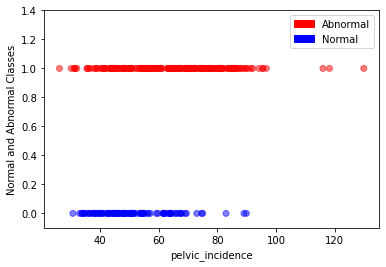

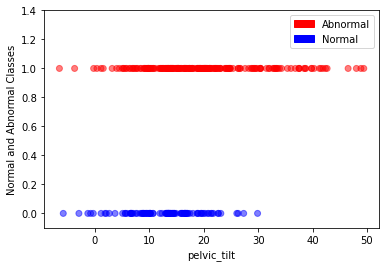

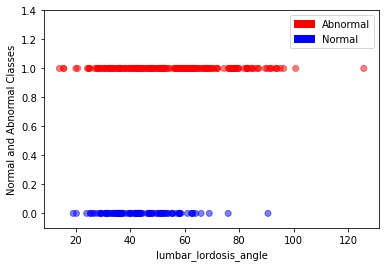

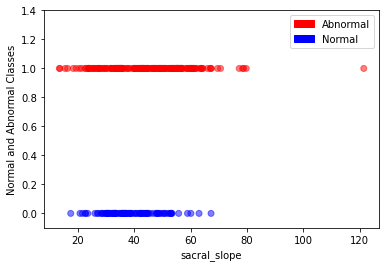

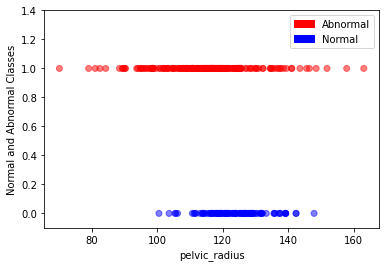

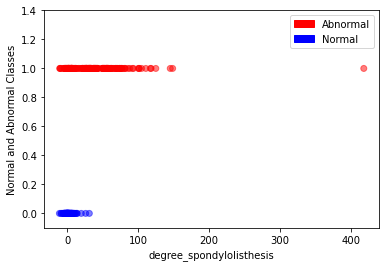

In [3]:
color = colors.ListedColormap(["blue","red"])
for col in column_2C.columns:
    if col!="class":
        fig, ax = plt.subplots()
        sp = ax.scatter(column_2C[col],column_2C["class"],cmap= color ,alpha=0.5,c=column_2C["class"], )
        ax.set_xlabel(col)
        ax.set_ylabel("Normal and Abnormal Classes")  
        
        red_patch = patches.Patch(color='red', label='Abnormal')
        blue_patch = patches.Patch(color='blue', label='Normal')
        plt.legend(handles=[red_patch,blue_patch])
        ax.set_ylim(-0.1,1.4)
        
        plt.show()

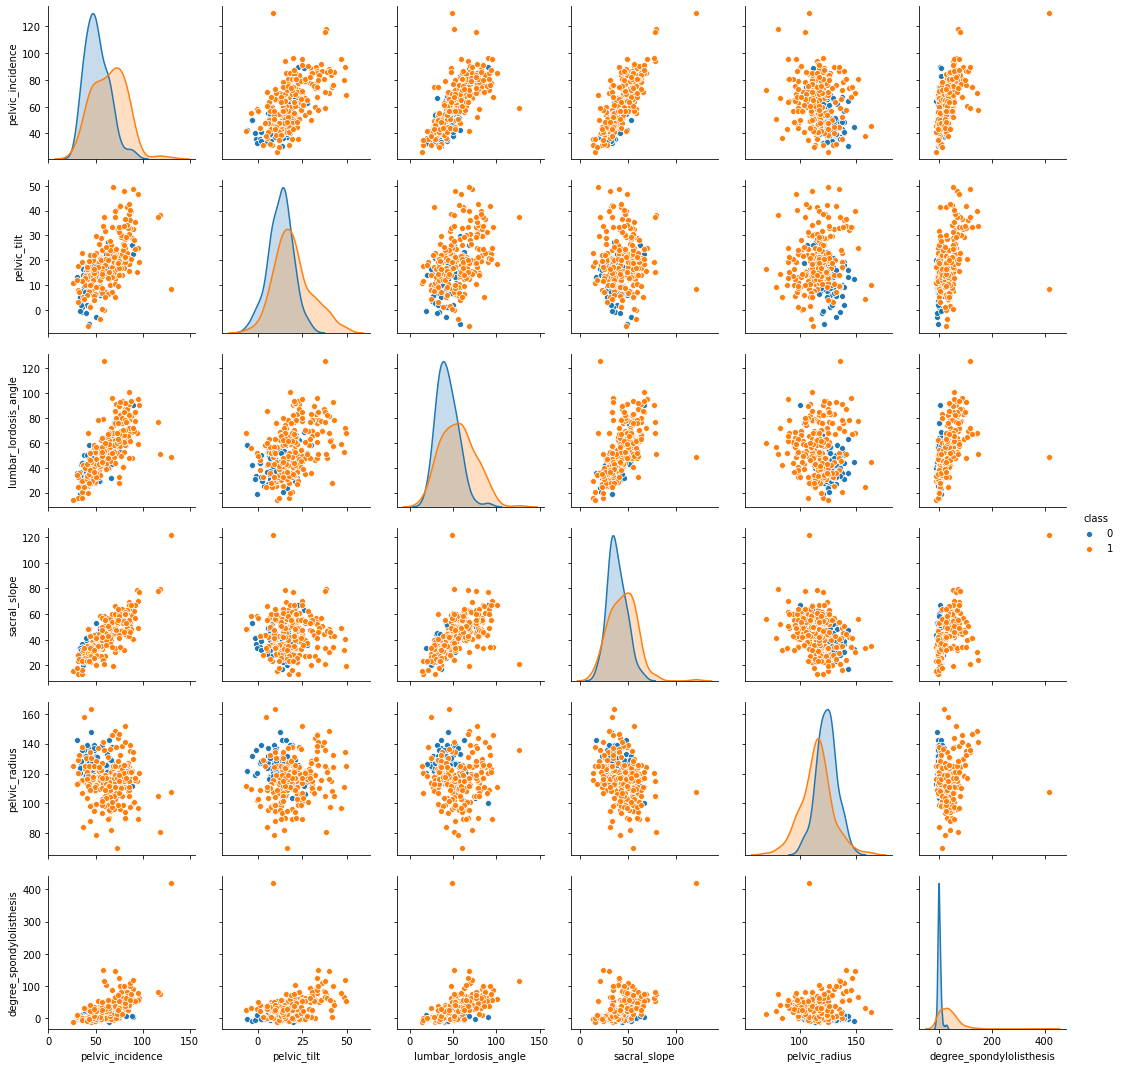

In [4]:
sns.pairplot( data=column_2C,hue='class', vars=[col for col in column_2C.columns[:-1] ])


## ii. Boxplots

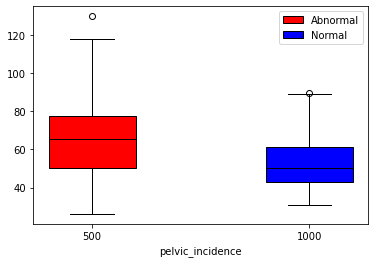

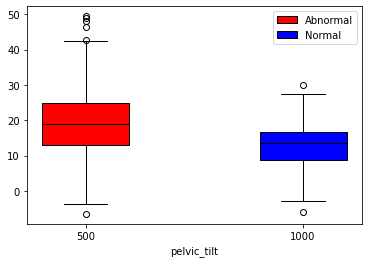

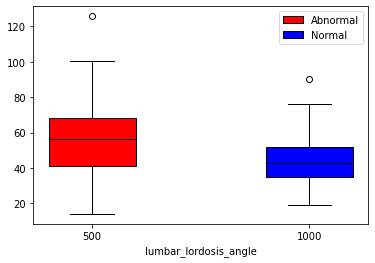

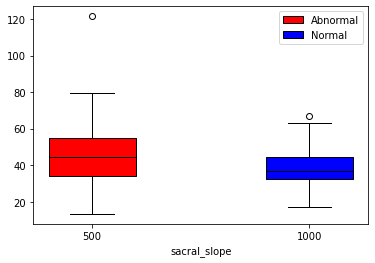

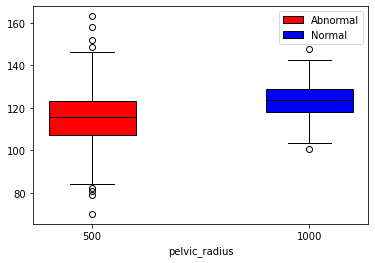

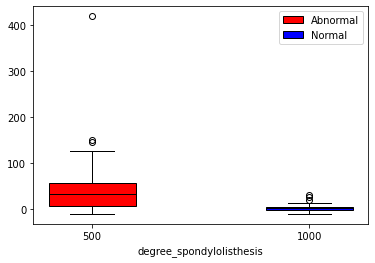

In [5]:
for col in column_2C.columns:
    if col!="class":
        fig, ax = plt.subplots()
        bp1 = ax.boxplot(column_2C[column_2C["class"]==0][col],positions=[1000],widths=200, patch_artist=True ) # set patch_artist true when you want to fill bp 
        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bp1[element], color="black")

        for patch in bp1['boxes']:
            patch.set(facecolor="blue")
            
        
        bp2 = ax.boxplot(column_2C[column_2C["class"]==1][col],positions=[500],widths=200, patch_artist=True )
        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bp2[element], color="black")

        for patch in bp2['boxes']:
            patch.set(facecolor="red")
        ax.legend([bp2["boxes"][0],bp1["boxes"][0]] , ['Abnormal','Normal'])
        ax.set_xlabel(col)

## iii. Split Data Set

In [6]:
normal_train   = column_2C[column_2C["class"]==0][:70]
abnormal_train = column_2C[column_2C["class"]==1][:140]
train          = pd.concat([normal_train,abnormal_train],ignore_index=True)
X_train = train.loc[:,train.columns!="class"]
Y_train = train["class"]


In [7]:
normal_test   = column_2C[column_2C["class"]==0][70:]
abnormal_test = column_2C[column_2C["class"]==1][140:]
test          = pd.concat([normal_test,abnormal_test],ignore_index=True)
X_test = test.loc[:,test.columns!="class"]
Y_test = test["class"]

# (c) Classification

## i. Euclidean Metric

Most suitable k for Euclidean distance is at k = 4 and error is : 0.06000000000000005


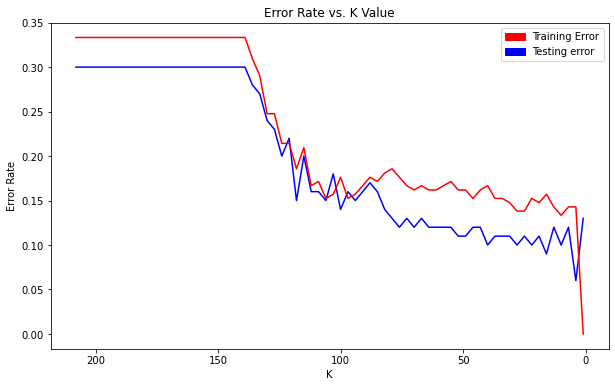

In [8]:
error_rate = []
train_error_rate=[]
mn         = math.inf
mn_train   = math.inf
idx        = 0
for k in range(208,0,-3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error= 1- accuracy_score(Y_test, y_pred)
    error_rate.append(error)
    if mn>error or (mn>=error and idx==1):
        idx=k
        mn=error
    
    y_pred_train = knn.predict(X_train)
    error_train= 1- accuracy_score(Y_train, y_pred_train)
    train_error_rate.append(error_train)
    if mn_train>error or (mn_train>=error_train and idx_train==1):
        idx_train =k
        mn_train  =error_train

Euc_train_err=mn_train
Euc_train_opt_k=idx_train

plt.figure(figsize=(10,6))
plt.plot(range(208,0,-3),error_rate,color='blue')
plt.plot(range(208,0,-3),train_error_rate,color='red')
red_patch = patches.Patch(color='red', label='Training Error')
blue_patch = patches.Patch(color='blue', label='Testing error')
plt.legend(handles=[red_patch,blue_patch])
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.gca().invert_xaxis()
print("Most suitable k for Euclidean distance is at k =",idx, "and error is :",mn)
# print("Euc_train_err:",Euc_train_err," Euc_train_k:",Euc_train_opt_k)

## ii. Test Data

In [9]:
k_star= idx
knn = KNeighborsClassifier(n_neighbors=k_star)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)


tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
# Sensitivity, hit rate, recall, or true positive rate
TPR = tp/(tp+fn)
# Specificity or true negative rate
TNR = tn/(tn+fp)
# Precision 
PPV = tp/(tp+fp)

f1_score= metrics.classification_report(Y_test, y_pred)

print("Confusion Matrix :\n",confusion_matrix(Y_test, y_pred))
print("True Positive Rate :", TPR)
print("True Negative Rate :", TNR)
print("Precision          :", PPV)
print("F1 Score           :\n", f1_score)

Confusion Matrix :
 [[25  5]
 [ 1 69]]
True Positive Rate : 0.9857142857142858
True Negative Rate : 0.8333333333333334
Precision          : 0.9324324324324325
F1 Score           :
               precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

   micro avg       0.94      0.94      0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



## iii. Learning Curve

Text(0, 0.5, 'Lowest Error')

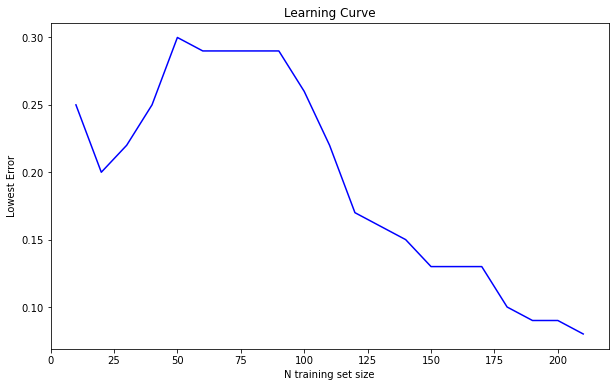

In [10]:
optimal_err = []
mn_train=math.inf
idx_train=0
for n in range(10,220,10):
    normal_size   = n//3
    abnormal_size = n-n//3
    n_xtrain = pd.concat([X_train[Y_train==0][:normal_size],X_train[Y_train==1][:abnormal_size]])
    n_ytrain = pd.concat([Y_train[Y_train==0][:normal_size],Y_train[Y_train==1][:abnormal_size]])
    
    mn=math.inf
    idx=0
    for k in range(1,min(200,n),5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(n_xtrain, n_ytrain)
        y_pred = knn.predict(X_test)
        error= 1- accuracy_score(Y_test, y_pred)
        error_rate.append(error)
        if mn>=error:
            idx=k
            mn=error
            
        y_pred_train = knn.predict(X_train)
        error_train= 1- accuracy_score(Y_train, y_pred_train)
        if mn_train>error or (mn_train>=error_train and idx==1):
            idx_train =k
            mn_train  =error_train
            
    optimal_err.append(mn)

multi_n_error=mn_train
plt.figure(figsize=(10,6))
plt.plot(range(10,220,10),optimal_err,color='blue')
plt.title('Learning Curve')
plt.xlabel('N training set size')
plt.ylabel('Lowest Error')

        
    

# (d) Other Metrics

## i. Minkowski Distance.

## A. Manhattan Distance with p = 1.

In [11]:
error_rate= []
mn=math.inf
idx=0
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k, p=1, metric="minkowski")
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error= 1- accuracy_score(Y_test, y_pred)
    error_rate.append(error)
    if mn>error or (mn>=error and idx==1):
        idx=k
        mn=error
    
    y_pred_train = knn.predict(X_train)
    error_train= 1- accuracy_score(Y_train, y_pred_train)
    if mn_train>error or (mn_train>=error_train and idx_train==1):
        idx_train =k
        mn_train  =error_train

Man_train_err   = mn_train
Man_train_opt_k = idx_train

optimal_Manhattan_k=idx
Man_error=mn
print("Most suitable for Manhattan distance is at k =",idx, "with error =",mn )

Most suitable for Manhattan distance is at k = 6 with error = 0.10999999999999999


## B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [12]:
error_rate= []
mn  = math.inf
idx = 0
for logp in range(1,11,1):
    knn = KNeighborsClassifier(n_neighbors=optimal_Manhattan_k, p=10**(logp/float(10)), metric="minkowski")
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error= 1- accuracy_score(Y_test, y_pred)
    error_rate.append(error)
    
    if mn>error:
        idx=logp
        mn=error
    
    y_pred_train = knn.predict(X_train)
    error_train= 1- accuracy_score(Y_train, y_pred_train)
    if mn_train>error or (mn_train>=error_train and idx==1):
        idx_train =k
        mn_train  =error_train


Minow_train_err=mn_train
Minow_train_opt_p=idx_train
        
opt_logp=idx/float(10)
print("Best value of log(p) =",idx/float(10), " for k =",optimal_Manhattan_k, "with error :",mn)

Best value of log(p) = 0.6  for k = 6 with error : 0.06000000000000005


## C. Chebyshev Distance With p -> infinity.

In [13]:
error_rate= []
mn=math.inf
idx=0
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k, p=math.inf)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error= 1- accuracy_score(Y_test, y_pred)
    error_rate.append(error)
    if mn>error or (mn>=error and idx==1):
        idx = k
        mn  = error
    y_pred_train = knn.predict(X_train)
    error_train= 1- accuracy_score(Y_train, y_pred_train)
    if mn_train>error or (mn_train>=error_train and idx_train==1):
        idx_train =k
        mn_train  =error_train

Cheb_train_err   = mn_train
Cheb_train_opt_k = idx_train
        
opt_Chebyshev_k=idx
min_Chebyshev_err= mn
print("Most suitable for Chebyshev distance is at k =",opt_Chebyshev_k, "with error =",mn )


Most suitable for Chebyshev distance is at k = 16 with error = 0.07999999999999996


## ii. Mahalanobis Distance.

In [14]:
error_rate= []
mn=math.inf
idx=0
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k,
            algorithm='brute',
            metric='mahalanobis',
            metric_params={ 'VI': np.linalg.inv(np.cov(X_train.T))
            }
        )
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error= 1- accuracy_score(Y_test, y_pred)
    error_rate.append(error)
    if mn>error or (mn>=error and idx==1):
        idx=k
        mn=error
    
    y_pred_train = knn.predict(X_train)
    error_train= 1- accuracy_score(Y_train, y_pred_train)
    if mn_train>error or (mn_train>=error_train and idx_train==1):
        idx_train =k
        mn_train  =error_train
    
Maha_train_err=mn_train
Maha_train_opt_k=idx_train

optimal_mahanoblis_k=idx
min_Maha_Err = mn
print("Most suitable for Mahanoblis distance is at k =",optimal_mahanoblis_k, "with error =",mn )

Most suitable for Mahanoblis distance is at k = 1 with error = 0.15000000000000002


In [15]:
error_table=pd.DataFrame({"Metric":["Manhattan Distance","Chebyshev Distance","Mahanoblis Distance"],
                          "Min_error":[Man_error ,min_Chebyshev_err,min_Maha_Err],
                          "K* value": [optimal_Manhattan_k,opt_Chebyshev_k,optimal_mahanoblis_k]
    
})
error_table

,Metric,Min_error,K* value
0,Manhattan Distance,0.11,6
1,Chebyshev Distance,0.08,16
2,Mahanoblis Distance,0.15,1


# (e) Weighted Decision

In [16]:
error_rate= []
mn=math.inf
idx=0
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k , weights="distance")
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error= 1- accuracy_score(Y_test, y_pred)
    error_rate.append(error)
    if mn>error or (mn>=error and idx==1):
        idx = k
        mn  = error
    y_pred_train = knn.predict(X_train)
    error_train= 1- accuracy_score(Y_train, y_pred_train)
    if mn_train>error or (mn_train>=error_train and idx_train==1):
        idx_train =k
        mn_train  =error_train

wEuc_train_err=mn_train
wEuc_train_opt_k=idx_train
        
opt_wEuc_k=idx
print("Most suitable for weighted Euclidean distance is at k =",opt_wEuc_k, "with error =",mn )

Most suitable for weighted Euclidean distance is at k = 6 with error = 0.09999999999999998


In [17]:
error_rate= []
mn=math.inf
idx=0
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k ,p=1 , metric="minkowski", weights="distance")
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error= 1- accuracy_score(Y_test, y_pred)
    error_rate.append(error)
    if mn>error or (mn>=error and idx==1):
        idx = k
        mn  = error
    
    y_pred_train = knn.predict(X_train)
    error_train= 1- accuracy_score(Y_train, y_pred_train)
    if mn_train>error or (mn_train>=error_train and idx_train==1):
        idx_train =k
        mn_train  =error_train

wMan_train_err=mn_train
wMan_train_opt_k=idx_train
        
opt_wManhat_k=idx
print("Most suitable for weighted Manhattan distance is at k =",opt_wManhat_k, "with error =",mn )

Most suitable for weighted Manhattan distance is at k = 26 with error = 0.09999999999999998


In [18]:
error_rate= []
mn=math.inf
idx=0
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k, p=math.inf, metric="minkowski", weights="distance")
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    error= 1- accuracy_score(Y_test, y_pred)
    error_rate.append(error)
    if mn>error or (mn>=error and idx==1):
        idx = k
        mn  = error
    y_pred_train = knn.predict(X_train)
    error_train= 1- accuracy_score(Y_train, y_pred_train)
    if mn_train>error or (mn_train>=error_train and idx==1):
        idx_train =k
        mn_train  =error_train

wCheb_train_err   = mn_train
wCheb_train_opt_k = idx_train
        
opt_wChebyshev_k=idx
print("Most suitable for weighted Chebyshev distance is at k =",opt_wChebyshev_k, "with error =",mn )


Most suitable for weighted Chebyshev distance is at k = 16 with error = 0.10999999999999999


## (f) Training Error Rate

In [19]:
min_train_error= min(Euc_train_err,multi_n_error,Man_train_err,Minow_train_err,Maha_train_err,wEuc_train_err,wMan_train_err,wCheb_train_err)
print("Min training error achieved :",min_train_error)

Min training error achieved : 0.0


### Training error is zero because at k=1 knn will act as a sort of lookup table because we test points against the training set itself which is the point checking against itself 